# Data Processing 

In [1]:
import numpy as np
import pandas as pd
import datetime 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

About rank database 
- gives top 100 songs each week of each year from 1958 to 2019

### Sampling the Songs
create a new dataframe with our sample 
- sort the rows in rank dataframe based on their chronological weekID order 
- we want to use completed decades (60s, 70s, 80s, 90s, 00s)
- pick the first five songs listed for each year (week rank 1-5)???
- need to pick carefully, because songs could be in the same ranks each week and we dont want duplicates 
- so we could pick 5 random songs each year

In [2]:
# read into dataframes
features_df = pd.read_csv('Hot 100 Audio Features.csv')
ranks_df = pd.read_csv('Hot Stuff.csv')

In [3]:
features_df.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),False,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,False,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,True,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


In [4]:
ranks_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [5]:
features = features_df.copy(deep=True)
ranks = ranks_df.copy(deep=True)

In [6]:
# ranks preprocessing
dt = []
for row_index, row in ranks.iterrows():
    temp = datetime.datetime.strptime(ranks.at[row_index, 'WeekID'], '%m/%d/%Y')
    dt.append(temp)
ranks['Datetime'] = dt

In [7]:
ranks = ranks.sort_values(by=['Datetime', 'Week Position'])
ranks.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Datetime
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1,1958-08-02
14,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,2,Patricia,Perez Prado And His Orchestra,PatriciaPerez Prado And His Orchestra,1,NaN,2,1,1958-08-02
29,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,3,Splish Splash,Bobby Darin,Splish SplashBobby Darin,1,NaN,3,1,1958-08-02
4795,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,4,Hard Headed Woman,Elvis Presley With The Jordanaires,Hard Headed WomanElvis Presley With The Jordan...,1,NaN,4,1,1958-08-02
157577,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,5,When,Kalin Twins,WhenKalin Twins,1,NaN,5,1,1958-08-02


In [8]:
ranks_sample= ranks.copy(deep=True)
ranks_sample.reset_index(drop=True, inplace=True)

In [9]:
# remove decades that arent complete (50s, 2010s)

years_1 = np.arange(1958, 1960)
years_2 = np.arange(2011, 2020)
years_removed = np.concatenate((years_1, years_2), axis=None)

# this takes so freaking long to load 
#for row_index, row in ranks_sample.iterrows(): 
    #if row['Datetime'].year in years_removed:
        #ranks_sample = ranks_sample.drop(row_index)

In [10]:
bad_rows = []

for row_index, row in ranks_sample.iterrows(): 
    if row['Datetime'].year in years_removed:
        bad_rows.append(row_index)

In [11]:
ranks_sample.drop(ranks_sample.index[bad_rows], inplace=True)

In [12]:
ranks_sample.reset_index(drop=True, inplace=True)

In [13]:
ranks_sample

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Datetime
0,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,1,El Paso,Marty Robbins,El PasoMarty Robbins,1,2.0,1,9,1960-01-02
1,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,2,Why,Frankie Avalon,WhyFrankie Avalon,1,1.0,1,7,1960-01-02
2,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,3,The Big Hurt,Miss Toni Fisher,The Big HurtMiss Toni Fisher,1,3.0,3,8,1960-01-02
3,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,4,Running Bear,Johnny Preston,Running BearJohnny Preston,2,11.0,4,12,1960-01-02
4,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,5,Way Down Yonder In New Orleans,Freddie Cannon,Way Down Yonder In New OrleansFreddie Cannon,1,5.0,5,7,1960-01-02
...,...,...,...,...,...,...,...,...,...,...,...
266090,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,96,September,Daughtry,SeptemberDaughtry,1,85.0,36,19,2010-12-25
266091,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,97,One In A Million,Ne-Yo,One In A MillionNe-Yo,1,92.0,87,7,2010-12-25
266092,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,98,Marry You,Bruno Mars,Marry YouBruno Mars,1,90.0,90,3,2010-12-25
266093,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,99,Porn Star Dancing,My Darkest Days Featuring Zakk Wylde,Porn Star DancingMy Darkest Days Featuring Zak...,2,NaN,99,6,2010-12-25


<b> Now that we have the years cleaned up, we need to make sure the we only analyze songs that are in both the updaded ranks dataframe and the features dataframe </b>
    
- merge them into one songs dataframe based on the songID column key

In [14]:
# merge ranks_sample and features dataframe into songs data frame
songs = pd.merge(ranks_sample, features, on='SongID', how='inner')

In [15]:
# clean up songs dataframe by removing columns we wont need 
cols_remove = ['Performer_y', 'Song_y', 'Weeks on Chart', 'Peak Position', 'Previous Week Position', 'Instance']
songs.drop(cols_remove, axis = 1, inplace=True)

songs.rename(columns={"Performer_x": "Performer", "Song_x": "Song"}, inplace=True)

songs

,url,WeekID,Week Position,Song,Performer,SongID,Datetime,spotify_genre,spotify_track_id,spotify_track_preview_url,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,1,El Paso,Marty Robbins,El PasoMarty Robbins,1960-01-02,"['cowboy western', 'nashville sound']",4f8hBeMXMvssn6HtFAtblo,https://p.scdn.co/mp3-preview/0bde321c4359f861...,...,2.0,-9.709,1.0,0.0300,0.8350,0.000029,0.1600,0.6910,106.662,3.0
1,http://www.billboard.com/charts/hot-100/1960-0...,1/9/1960,1,El Paso,Marty Robbins,El PasoMarty Robbins,1960-01-09,"['cowboy western', 'nashville sound']",4f8hBeMXMvssn6HtFAtblo,https://p.scdn.co/mp3-preview/0bde321c4359f861...,...,2.0,-9.709,1.0,0.0300,0.8350,0.000029,0.1600,0.6910,106.662,3.0
2,http://www.billboard.com/charts/hot-100/1960-0...,1/16/1960,3,El Paso,Marty Robbins,El PasoMarty Robbins,1960-01-16,"['cowboy western', 'nashville sound']",4f8hBeMXMvssn6HtFAtblo,https://p.scdn.co/mp3-preview/0bde321c4359f861...,...,2.0,-9.709,1.0,0.0300,0.8350,0.000029,0.1600,0.6910,106.662,3.0
3,http://www.billboard.com/charts/hot-100/1960-0...,1/23/1960,2,El Paso,Marty Robbins,El PasoMarty Robbins,1960-01-23,"['cowboy western', 'nashville sound']",4f8hBeMXMvssn6HtFAtblo,https://p.scdn.co/mp3-preview/0bde321c4359f861...,...,2.0,-9.709,1.0,0.0300,0.8350,0.000029,0.1600,0.6910,106.662,3.0
4,http://www.billboard.com/charts/hot-100/1960-0...,1/30/1960,3,El Paso,Marty Robbins,El PasoMarty Robbins,1960-01-30,"['cowboy western', 'nashville sound']",4f8hBeMXMvssn6HtFAtblo,https://p.scdn.co/mp3-preview/0bde321c4359f861...,...,2.0,-9.709,1.0,0.0300,0.8350,0.000029,0.1600,0.6910,106.662,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265187,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,59,Welcome Christmas,Glee Cast,Welcome ChristmasGlee Cast,2010-12-25,"['glee club', 'hollywood', 'post-teen pop']",453OW4naq3cgZlk9oaHCu9,https://p.scdn.co/mp3-preview/802b81ffd968fcf2...,...,11.0,-9.302,1.0,0.0297,0.9110,0.000000,0.2750,0.0819,110.822,4.0
265188,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,68,Rolling In The Deep,Adele,Rolling In The DeepAdele,2010-12-25,"['british soul', 'pop', 'uk pop']",1CkvWZme3pRgbzaxZnTl5X,https://p.scdn.co/mp3-preview/8c174ce25d94b502...,...,8.0,-5.119,1.0,0.0294,0.1310,0.000000,0.0527,0.5220,104.945,4.0
265189,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,89,No BS,Chris Brown,No BSChris Brown,2010-12-25,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",6P3cUSAoT4EeMxVgWVdBra,https://p.scdn.co/mp3-preview/4b3158b2f9d396b8...,...,1.0,-6.359,0.0,0.0567,0.1200,0.000000,0.1190,0.1060,172.171,4.0
265190,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,94,Bass Down Low,Dev Featuring The Cataracs,Bass Down LowDev Featuring The Cataracs,2010-12-25,"['dance pop', 'electropop']",4Xf7EL8G6FRYwvJADl0nf4,NaN,...,0.0,-8.022,1.0,0.0628,0.0886,0.000000,0.0499,0.8340,113.035,4.0


In [16]:
# lets remove rows with duplicate SongIDs just for funsies 
songs = songs.drop_duplicates(subset='SongID', keep="first")
songs.reset_index(drop=True, inplace=True)

In [17]:
# add a separate row with only the year
years = []
for row_index, row in songs.iterrows(): 
    years.append(row["Datetime"].year)
    
songs['Year'] = years

<ipython-input-17-9f29240c79be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['Year'] = years


In [18]:
songs

,url,WeekID,Week Position,Song,Performer,SongID,Datetime,spotify_genre,spotify_track_id,spotify_track_preview_url,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year
0,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,1,El Paso,Marty Robbins,El PasoMarty Robbins,1960-01-02,"['cowboy western', 'nashville sound']",4f8hBeMXMvssn6HtFAtblo,https://p.scdn.co/mp3-preview/0bde321c4359f861...,...,-9.709,1.0,0.0300,0.8350,0.000029,0.1600,0.6910,106.662,3.0,1960
1,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,2,Why,Frankie Avalon,WhyFrankie Avalon,1960-01-02,"['adult standards', 'brill building pop', 'bub...",0CRxGsJrwOMQUuTr4yT5mX,https://p.scdn.co/mp3-preview/67736cba6b729941...,...,-8.677,1.0,0.0264,0.7620,0.000000,0.1300,0.5860,94.267,4.0,1960
2,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,3,The Big Hurt,Miss Toni Fisher,The Big HurtMiss Toni Fisher,1960-01-02,['deep adult standards'],37Au0ObjCx4KD76YBe4Y9g,https://p.scdn.co/mp3-preview/fa1e0fcba1938041...,...,-8.309,1.0,0.0299,0.7830,0.000000,0.1730,0.6760,123.919,4.0,1960
3,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,4,Running Bear,Johnny Preston,Running BearJohnny Preston,1960-01-02,"['brill building pop', 'deep adult standards',...",1RYznli2VNO7FCbW1Hq4KM,https://p.scdn.co/mp3-preview/2f892626e1b7c60a...,...,-14.679,0.0,0.0530,0.8540,0.000008,0.1250,0.8220,119.987,4.0,1960
4,http://www.billboard.com/charts/hot-100/1960-0...,1/2/1960,5,Way Down Yonder In New Orleans,Freddie Cannon,Way Down Yonder In New OrleansFreddie Cannon,1960-01-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23615,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,59,Welcome Christmas,Glee Cast,Welcome ChristmasGlee Cast,2010-12-25,"['glee club', 'hollywood', 'post-teen pop']",453OW4naq3cgZlk9oaHCu9,https://p.scdn.co/mp3-preview/802b81ffd968fcf2...,...,-9.302,1.0,0.0297,0.9110,0.000000,0.2750,0.0819,110.822,4.0,2010
23616,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,68,Rolling In The Deep,Adele,Rolling In The DeepAdele,2010-12-25,"['british soul', 'pop', 'uk pop']",1CkvWZme3pRgbzaxZnTl5X,https://p.scdn.co/mp3-preview/8c174ce25d94b502...,...,-5.119,1.0,0.0294,0.1310,0.000000,0.0527,0.5220,104.945,4.0,2010
23617,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,89,No BS,Chris Brown,No BSChris Brown,2010-12-25,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",6P3cUSAoT4EeMxVgWVdBra,https://p.scdn.co/mp3-preview/4b3158b2f9d396b8...,...,-6.359,0.0,0.0567,0.1200,0.000000,0.1190,0.1060,172.171,4.0,2010
23618,http://www.billboard.com/charts/hot-100/2010-1...,12/25/2010,94,Bass Down Low,Dev Featuring The Cataracs,Bass Down LowDev Featuring The Cataracs,2010-12-25,"['dance pop', 'electropop']",4Xf7EL8G6FRYwvJADl0nf4,NaN,...,-8.022,1.0,0.0628,0.0886,0.000000,0.0499,0.8340,113.035,4.0,2010


<b> Now, we want to pick 5 random songs from every year (250 total songs) </b>
- im not sure how to do this, but for now lets look at the 1st 5 songs of every year (week position 1-5)
- the only way I can think to do this is to make a separate dataframe for each year and then take a sample of that?   then merge? yikes!
- downside to this: we will end up just examining the songs popular in january of every year :(

## Data Visualizations

Lets look at how different acoustic features change over the years!
we are going to look at the songs database here, which has all of the songs from 1960 to 2010 along with the corresponding acoustic features 

Examining the following features for relationships to year <br>
- key
- mode
- time_signature
- acousticness 
- danceability 
- energy 
- instrumentalness
- liveness
- loudness
- speechiness
- valence 
- tempo 

In [19]:
# find the average of each feature for each year
df = songs.copy()

acoustic_features = ['danceability','energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'time_signature']

feature_averages = df.groupby(["Year"])[acoustic_features].mean()
feature_averages.reset_index(inplace=True)

feature_averages.head()

,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1960,0.512117,0.448221,5.106472,-10.994630,0.864301,0.048456,0.671542,0.071115,0.205894,0.636797,117.536862,3.768267
1,1961,0.526298,0.484366,4.941176,-10.401323,0.872211,0.054646,0.663218,0.080351,0.219841,0.666214,117.653917,3.778905
2,1962,0.542925,0.473957,5.191268,-10.939143,0.862786,0.057668,0.640609,0.072437,0.213300,0.666925,118.661466,3.796258
3,1963,0.528894,0.507609,5.056017,-10.378363,0.858921,0.051589,0.602546,0.056664,0.245845,0.667789,119.691562,3.813278
4,1964,0.531402,0.550121,5.085661,-9.978060,0.864060,0.048574,0.551087,0.048255,0.232526,0.689327,119.873927,3.824953


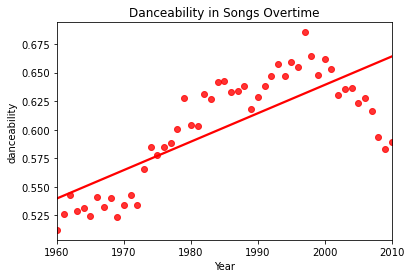

In [20]:
# Plot year vs danceability 
sns.regplot(x="Year", y="danceability", data=feature_averages, ci=None, color="red");

# Display the plot
plt.title("Danceability in Songs Overtime")
plt.show()

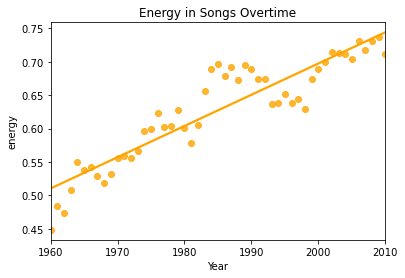

In [21]:
# Plot year vs energy
sns.regplot(x="Year", y="energy", data=feature_averages, ci=None, color="orange");

# Display the plot
plt.title("Energy in Songs Overtime")
plt.show()

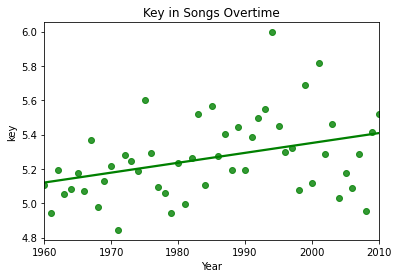

In [22]:
# Plot year vs key
sns.regplot(x="Year", y="key", data=feature_averages, ci=None, color="green");

# Display the plot
plt.title("Key in Songs Overtime")
plt.show()

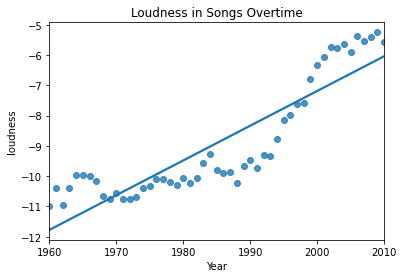

In [23]:
# Plot year vs loudness
sns.regplot(x="Year", y="loudness", data=feature_averages, ci=None);

# Display the plot
plt.title("Loudness in Songs Overtime")
plt.show()

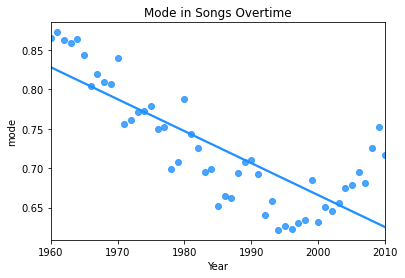

In [24]:
# Plot year vs mode
sns.regplot(x="Year", y="mode", data=feature_averages, ci=None, color="dodgerBlue");

# Display the plot
plt.title("Mode in Songs Overtime")
plt.show()

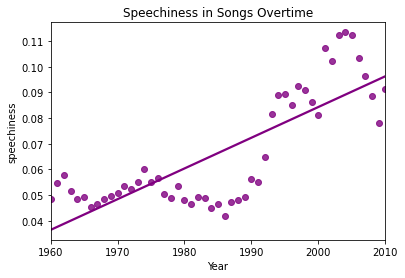

In [25]:
# Plot year vs speechiness
sns.regplot(x="Year", y="speechiness", data=feature_averages, ci=None, color="purple");

# Display the plot
plt.title("Speechiness in Songs Overtime")
plt.show()

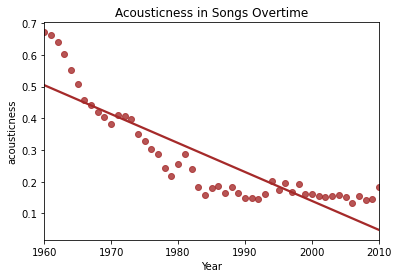

In [26]:
# Plot year vs acousticness
sns.regplot(x="Year", y="acousticness", data=feature_averages, ci=None, color="brown");

# Display the plot
plt.title("Acousticness in Songs Overtime")
plt.show()

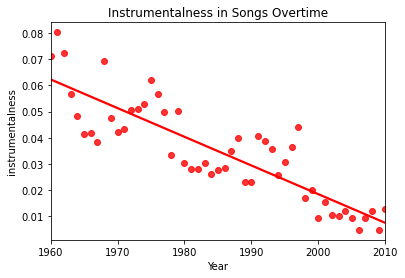

In [27]:
# Plot year vs instrumentalness
sns.regplot(x="Year", y="instrumentalness", data=feature_averages, ci=None, color="red");

# Display the plot
plt.title("Instrumentalness in Songs Overtime")
plt.show()

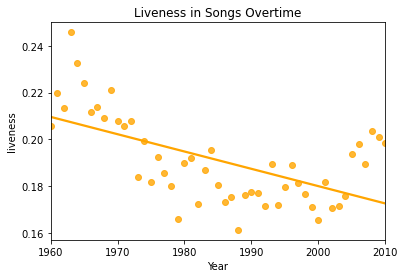

In [28]:
# Plot year vs liveness
sns.regplot(x="Year", y="liveness", data=feature_averages, ci=None, color="orange");

# Display the plot
plt.title("Liveness in Songs Overtime")
plt.show()

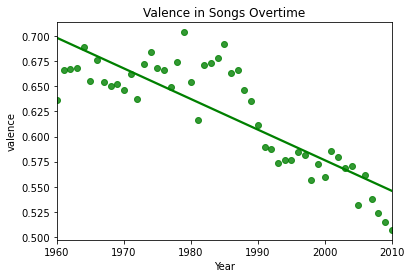

In [29]:
# Plot year vs valence
sns.regplot(x="Year", y="valence", data=feature_averages, ci=None, color="green");

# Display the plot
plt.title("Valence in Songs Overtime")
plt.show()

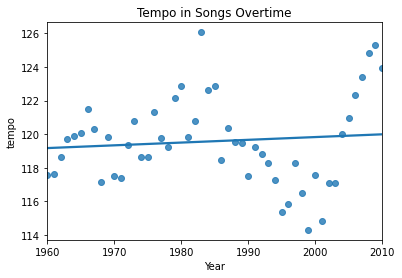

In [30]:
# Plot year vs tempo
sns.regplot(x="Year", y="tempo", data=feature_averages, ci=None);

# Display the plot
plt.title("Tempo in Songs Overtime")
plt.show()

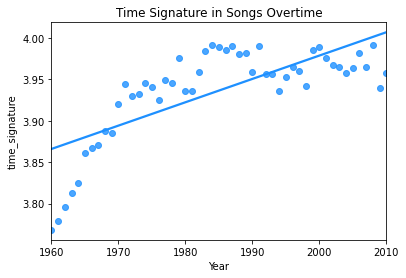

In [32]:
# Plot year vs time signature
sns.regplot(x="Year", y="time_signature", data=feature_averages, ci=None, color="dodgerBlue");

# Display the plot
plt.title("Time Signature in Songs Overtime")
plt.show()

Different way of organizing the plots 

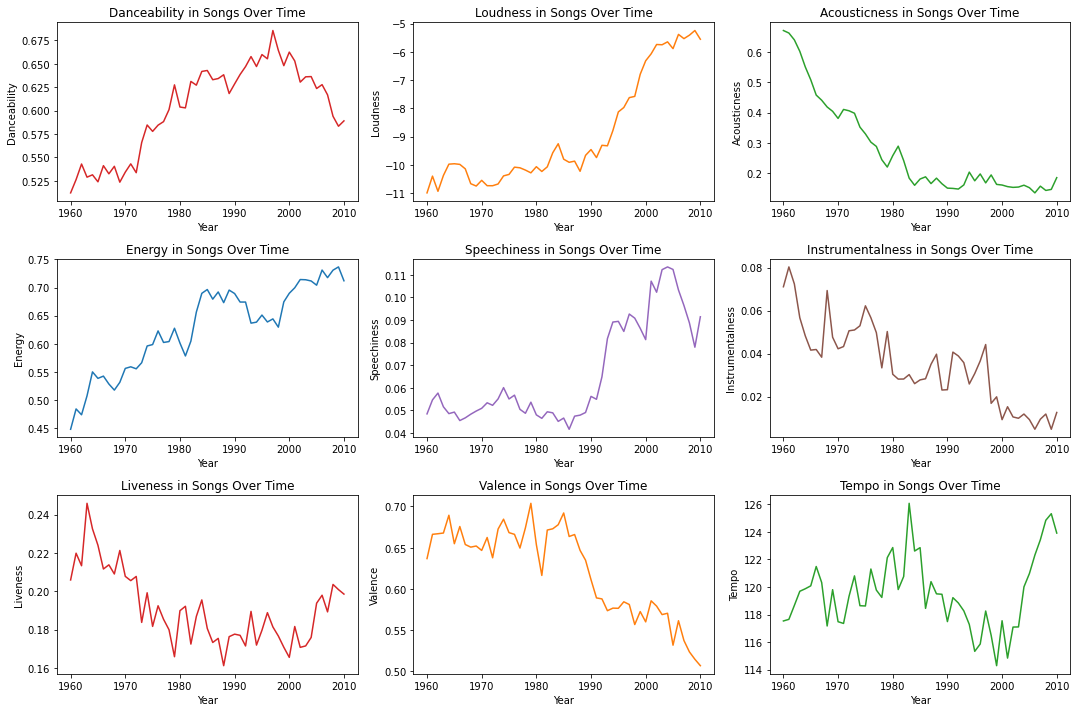

In [70]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))

x = feature_averages['Year']

# Plot Danceability
axs[0, 0].plot(x, feature_averages['danceability'],  'tab:red')
axs[0, 0].set_title("Danceability in Songs Over Time")
axs[0, 0].set(ylabel='Danceability')

# Plot Loudness
axs[0, 1].plot(x, feature_averages['loudness'], 'tab:orange')
axs[0, 1].set_title("Loudness in Songs Over Time")
axs[0, 1].set(ylabel='Loudness')

# Plot Acousticness
axs[0, 2].plot(x, feature_averages['acousticness'], 'tab:green')
axs[0, 2].set_title("Acousticness in Songs Over Time")
axs[0, 2].set(ylabel='Acousticness')

# Plot Energy
axs[1, 0].plot(x, feature_averages['energy'], 'tab:blue')
axs[1, 0].set_title("Energy in Songs Over Time")
axs[1, 0].set(ylabel='Energy')

# Plot Speechiness 
axs[1, 1].plot(x, feature_averages['speechiness'], 'tab:purple')
axs[1, 1].set_title("Speechiness in Songs Over Time")
axs[1, 1].set(ylabel='Speechiness')

# Plot Instrumentalness
axs[1, 2].plot(x, feature_averages['instrumentalness'], 'tab:brown')
axs[1, 2].set_title("Instrumentalness in Songs Over Time")
axs[1, 2].set(ylabel='Instrumentalness')

# Plot Liveness
axs[2, 0].plot(x, feature_averages['liveness'], 'tab:red')
axs[2, 0].set_title("Liveness in Songs Over Time")
axs[2, 0].set(ylabel='Liveness')

# Plot Valence
axs[2, 1].plot(x, feature_averages['valence'], 'tab:orange')
axs[2, 1].set_title("Valence in Songs Over Time")
axs[2, 1].set(ylabel='Valence')

# Plot Tempo
axs[2, 2].plot(x, feature_averages['tempo'], 'tab:green')
axs[2, 2].set_title("Tempo in Songs Over Time")
axs[2, 2].set(ylabel='Tempo')

# Set x axis labels to Year
for ax in axs.flat:
    ax.set(xlabel='Year')
    
fig.tight_layout()

In [73]:
# ALL THE YEARSSS

ranks_sample2 = ranks.copy(deep=True)

# merge ranks_sample and features dataframe into songs data frame
songs_2 = pd.merge(ranks_sample2, features, on='SongID', how='inner')

# clean up songs dataframe by removing columns we wont need 
cols_remove = ['Performer_y', 'Song_y', 'Weeks on Chart', 'Peak Position', 'Previous Week Position', 'Instance']
songs_2.drop(cols_remove, axis = 1, inplace=True)

songs_2.rename(columns={"Performer_x": "Performer", "Song_x": "Song"}, inplace=True)


# lets remove rows with duplicate SongIDs just for funsies 
songs_2 = songs_2.drop_duplicates(subset='SongID', keep="first")
songs_2.reset_index(drop=True, inplace=True)


# add a separate row with only the year
years = []
for row_index, row in songs_2.iterrows(): 
    years.append(row["Datetime"].year)
    
songs_2['Year'] = years

In [81]:
# find the average of each feature for each year
df_2 = songs_2.copy(deep=True)

acoustic_features_2 = ['danceability','energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'time_signature']

feature_averages_2 = df_2.groupby(["Year"])[acoustic_features_2].mean()
feature_averages_2.reset_index(inplace=True)

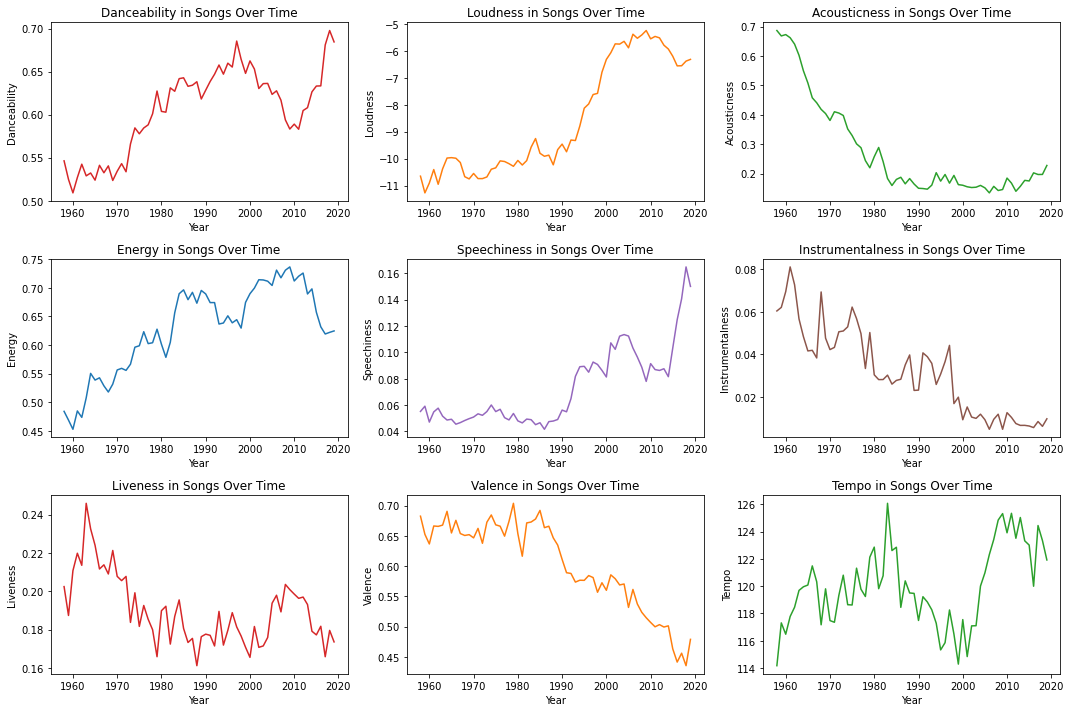

In [82]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))

x = feature_averages_2['Year']

# Plot Danceability
axs[0, 0].plot(x, feature_averages_2['danceability'],  'tab:red')
axs[0, 0].set_title("Danceability in Songs Over Time")
axs[0, 0].set(ylabel='Danceability')

# Plot Loudness
axs[0, 1].plot(x, feature_averages_2['loudness'], 'tab:orange')
axs[0, 1].set_title("Loudness in Songs Over Time")
axs[0, 1].set(ylabel='Loudness')

# Plot Acousticness
axs[0, 2].plot(x, feature_averages_2['acousticness'], 'tab:green')
axs[0, 2].set_title("Acousticness in Songs Over Time")
axs[0, 2].set(ylabel='Acousticness')

# Plot Energy
axs[1, 0].plot(x, feature_averages_2['energy'], 'tab:blue')
axs[1, 0].set_title("Energy in Songs Over Time")
axs[1, 0].set(ylabel='Energy')

# Plot Speechiness 
axs[1, 1].plot(x, feature_averages_2['speechiness'], 'tab:purple')
axs[1, 1].set_title("Speechiness in Songs Over Time")
axs[1, 1].set(ylabel='Speechiness')

# Plot Instrumentalness
axs[1, 2].plot(x, feature_averages_2['instrumentalness'], 'tab:brown')
axs[1, 2].set_title("Instrumentalness in Songs Over Time")
axs[1, 2].set(ylabel='Instrumentalness')

# Plot Liveness
axs[2, 0].plot(x, feature_averages_2['liveness'], 'tab:red')
axs[2, 0].set_title("Liveness in Songs Over Time")
axs[2, 0].set(ylabel='Liveness')

# Plot Valence
axs[2, 1].plot(x, feature_averages_2['valence'], 'tab:orange')
axs[2, 1].set_title("Valence in Songs Over Time")
axs[2, 1].set(ylabel='Valence')

# Plot Tempo
axs[2, 2].plot(x, feature_averages_2['tempo'], 'tab:green')
axs[2, 2].set_title("Tempo in Songs Over Time")
axs[2, 2].set(ylabel='Tempo')

# Set x axis labels to Year
for ax in axs.flat:
    ax.set(xlabel='Year')
    
fig.tight_layout()

This code is a big MESS but this version honeslty gives more interesting results? Especially when looking at how things change after 2010 (speechiness, tempo, danceability)